# Project Business Statistics: E-news Express


## Define Problem Statement and Objectives

**Problem Statement**

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]


**Objective**


The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language?

4. Is the time spent on the new page the same for the different language users?

## Import all the necessary libraries

In [ ]:
#library used for data manipulation and analysis
import pandas as pd 
# library used for working with arrays.
import numpy as np 
# library for plots and visualisations
import matplotlib.pyplot as plt 
 # library for visualisations
import seaborn as sns
%matplotlib inline 
# to restrict the float value to 2 decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# this library contains a large number of probability distributions as well as a growing library of statistical functions.
import scipy.stats as stats 
import warnings
warnings.filterwarnings("ignore")

## Reading the Data into a DataFrame

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
path="/content/drive/MyDrive/Business Statistics/abtest.csv" 
e_news=pd.read_csv(path)
# copying data to another variable to avoid any changes to original data
df = e_news.copy()


## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [ ]:
# returns the first 5 rows
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
# returns the last 5 rows
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [ ]:
#checking the number of rows and columns
print('DataFrame contains',df.shape[0], 'rows and ',df.shape[1],'columns')

DataFrame contains 100 rows and  6 columns


**Observation:**

* DataFrame contains 100 rows and 6 columns

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.00,NaN,NaN,NaN,546517.00,52.30,546443.00,546467.75,546492.50,546567.25,546592.00
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.00,NaN,NaN,NaN,5.38,2.38,0.19,3.88,5.42,7.02,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observation:**

* Both control and treatment have same frquency
* Both new and old landing page have same frequency
* On average user spend 5.38 minutes on the website
* The minimun time spent on the website is 0.19 minutes and maximun is 10.71 minutes
* 75% of users spend 7.02 minutes or less on the website
* The mean is less than the median which mean the distribution is slightly left skewed
* In the 100 people that visited the website 54 were converted
* Spanish is the preferred language

In [ ]:
# Checkin if there are missing values in the DataFrame
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

**Observation:**

* There are no missing values in the DataFrame

In [ ]:
# Checking if there are duplicated values
df.duplicated().sum()

0

**Observation:**

* There are not duplicated values in the DataFrame

### Univariate Analysis

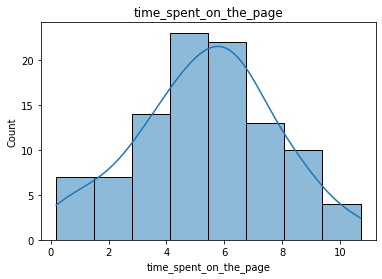

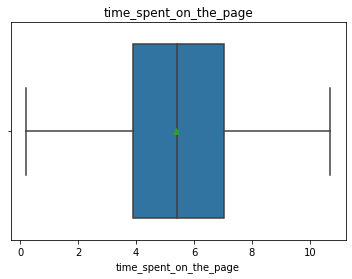

In [ ]:
# Displaying histogram and boxplot
sns.histplot(data=df,x='time_spent_on_the_page',kde=True)
plt.title('time_spent_on_the_page')
plt.show()
sns.boxplot(data=df,x='time_spent_on_the_page',showmeans=True)
plt.title('time_spent_on_the_page')
plt.show()

**Observation:**

* 50% of users spend 5.415 minutes and more on the website
* The distribution is slightly left skewed
* There are no outliers

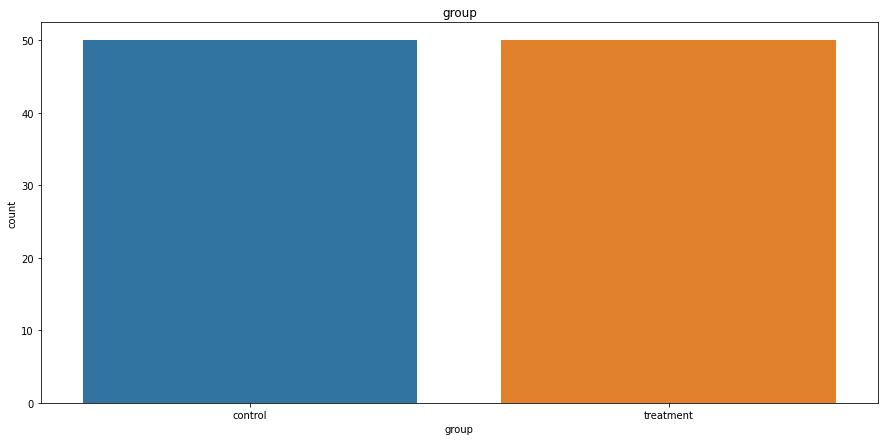

In [ ]:
# Displaying barplot
plt.figure(figsize=(15,7))
sns.countplot(data=df,x='group')
plt.title('group')
plt.show()

**Observation:**

* Both control and treatnment group have same number users

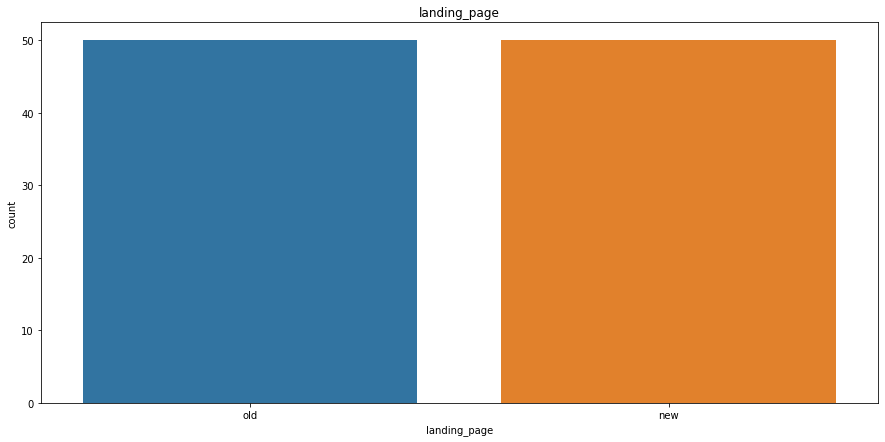

In [ ]:
# Displaying barplot
plt.figure(figsize=(15,7))
sns.countplot(data=df,x='landing_page')
plt.title('landing_page')
plt.show()

**Observation:**

Both new and old landing page have same number visits

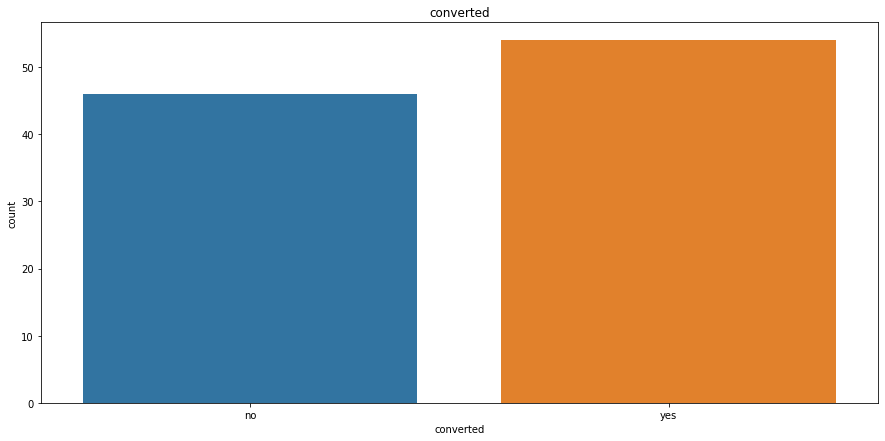

In [ ]:
# Displaying barplot
plt.figure(figsize=(15,7))
sns.countplot(data=df,x='converted')
plt.title('converted')
plt.show()

**Observation:**

* 54% of users were converted

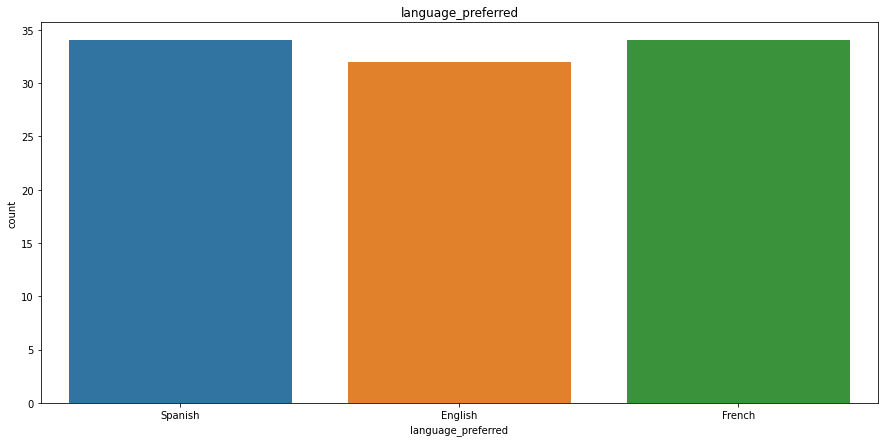

In [ ]:
# Displaying barplot
plt.figure(figsize=(15,7))
sns.countplot(data=df,x='language_preferred')
plt.title('language_preferred')
plt.show()

**Observation:**

* Both Spanish and French are the most preferred languages with 34% then English follow with 32%

### Bivariate Analysis

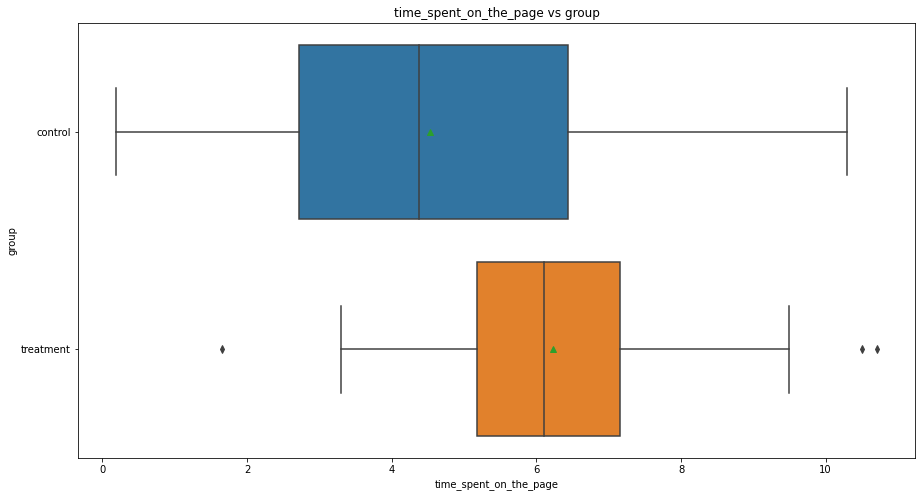

In [ ]:
# Displaying boxplot
plt.figure(figsize=(15,8))
sns.boxplot(data=df,x='time_spent_on_the_page',y='group',showmeans=True)
plt.title('time_spent_on_the_page vs group')
plt.show()

**Observation:**

* On average users in the treatment group spend more time on the website compared to users in the control group
* There are outliers in the treatment group


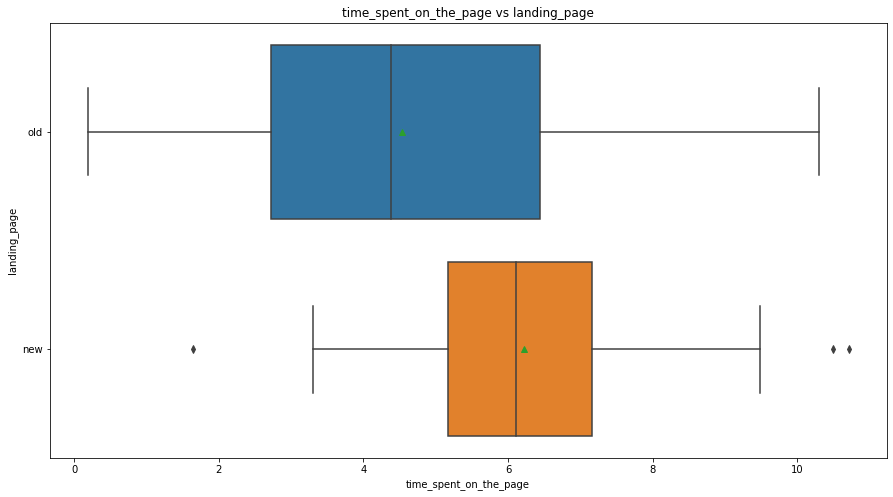

In [ ]:
# Displaying boxplot
plt.figure(figsize=(15,8))
sns.boxplot(data=df,x='time_spent_on_the_page',y='landing_page',showmeans=True)
plt.title('time_spent_on_the_page vs landing_page')
plt.show()

**Observation:**

* On average users spend more time on the website with new landing page vis a vis the old landing page
* There are outliers in the time spent on website with new landing page

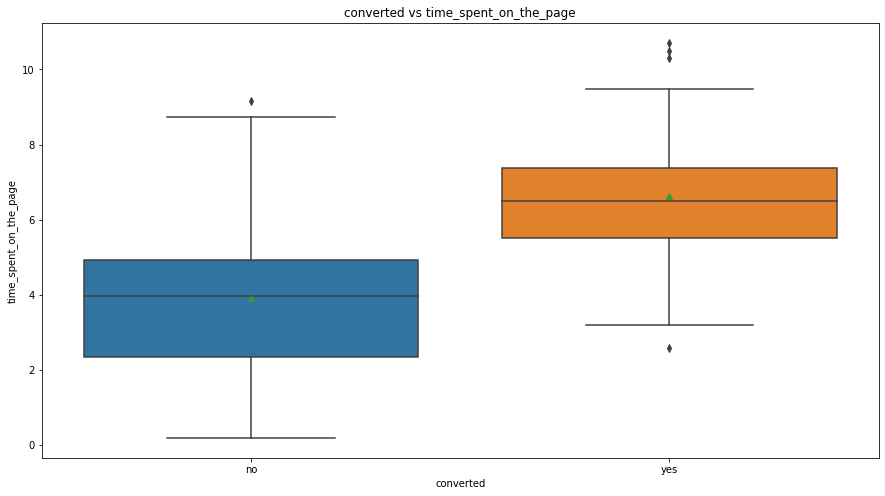

In [ ]:
# Displaying boxplot
plt.figure(figsize=(15,8))
sns.boxplot(data=df,x='converted',y='time_spent_on_the_page',showmeans=True)
plt.title('converted vs time_spent_on_the_page')
plt.show()

**Observation:**

* On average users who spend more time in the website got converted
* There are outliers in users who got converted
* There are outliers in the upper side on users who were not converted

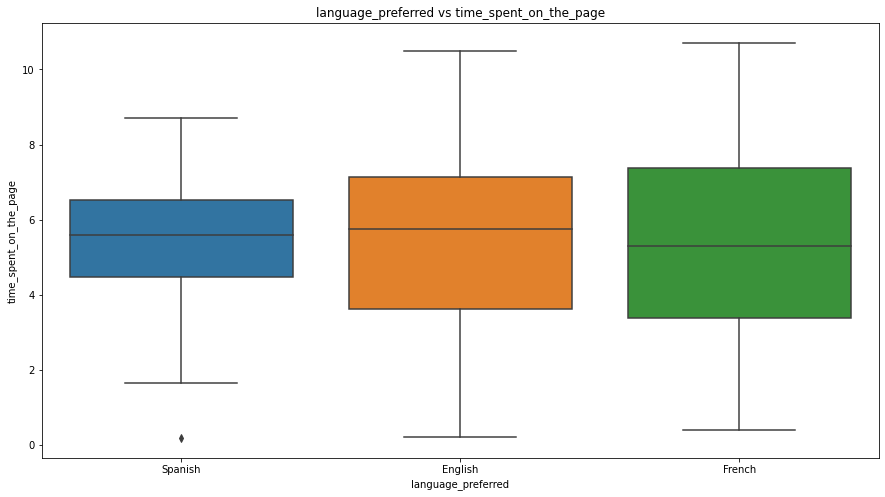

In [ ]:
# Displaying boxplot
plt.figure(figsize=(15,8))
sns.boxplot(data=df,x='language_preferred',y='time_spent_on_the_page')
plt.title('language_preferred vs time_spent_on_the_page')
plt.show()

**Observation:**

* Users who speak English spend more time on the webiste,followed by French speaking users then Spanish speaking users
* There are outliers on the lower side for Spanish speaking users

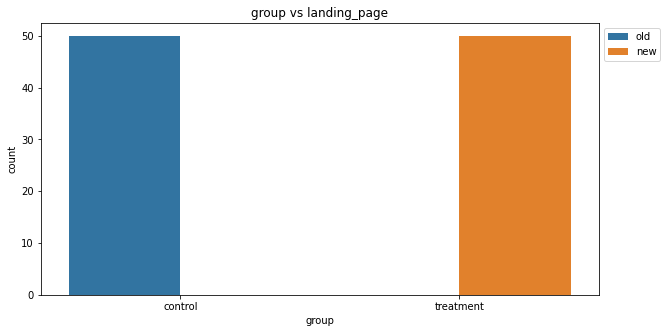

In [ ]:
# Diplaying count plot
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='group',hue='landing_page',dodge=True)
plt.legend(['old','new'],bbox_to_anchor=(1,0.999))
plt.title('group vs landing_page')
plt.show()

**Observation:**

* Users in the control group visited only the website with old landing page wheras users in the treatment group visited only the website with new landing page

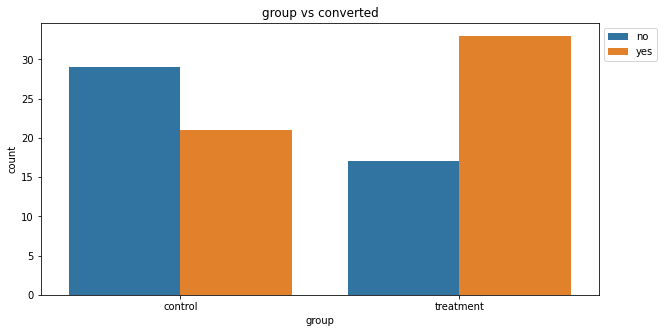

In [ ]:
# Diplaying count plot
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='group',hue='converted')
plt.legend(['no','yes'],bbox_to_anchor=(1,0.999))
plt.title('group vs converted')
plt.show()

**Observation:**

* Most users got converted in the treatment group

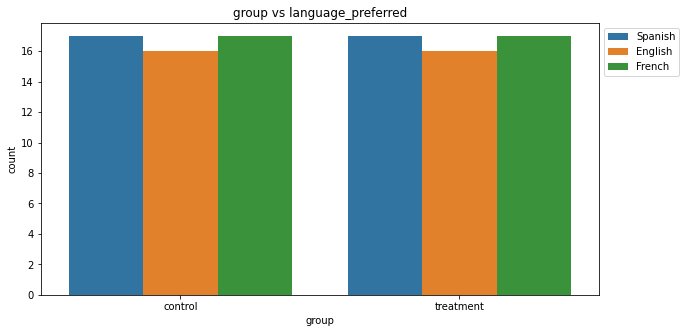

In [ ]:
# Diplaying count plot
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='group',hue='language_preferred')
plt.legend(['Spanish','English','French'],bbox_to_anchor=(1,0.999))
plt.title('group vs language_preferred')
plt.show()

**Observation:**

* There are more Spanish and French speaking users in both group

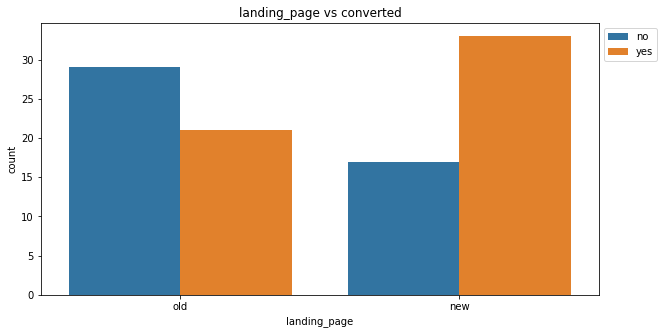

In [ ]:
# Diplaying count plot
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='landing_page',hue='converted')
plt.legend(['no','yes'],bbox_to_anchor=(1,0.999))
plt.title('landing_page vs converted')
plt.show()

**Observation:**

There are more converted users in the new landing page

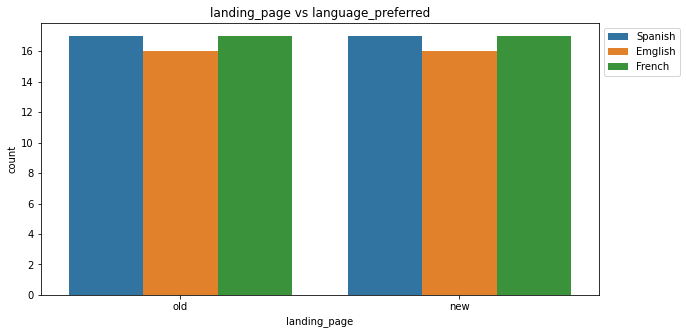

In [ ]:
# Diplaying count plot
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='landing_page',hue='language_preferred')
plt.title('landing_page vs language_preferred')
plt.legend(['Spanish','Emglish','French'],bbox_to_anchor=(1,0.999))
plt.show()

**Observation:**

* There are more Spanish and French speaking users in both landing page

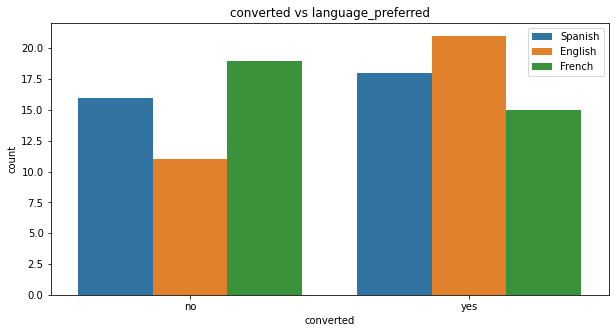

In [ ]:
# Diplaying count plot
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='converted',hue='language_preferred')
plt.title('converted vs language_preferred')
plt.legend(['Spanish','English','French'],bbox_to_anchor=(1,0.999))
plt.show()

**Observation:**

* English speaking users are the most converted 
* French speaking users are the least converted





## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

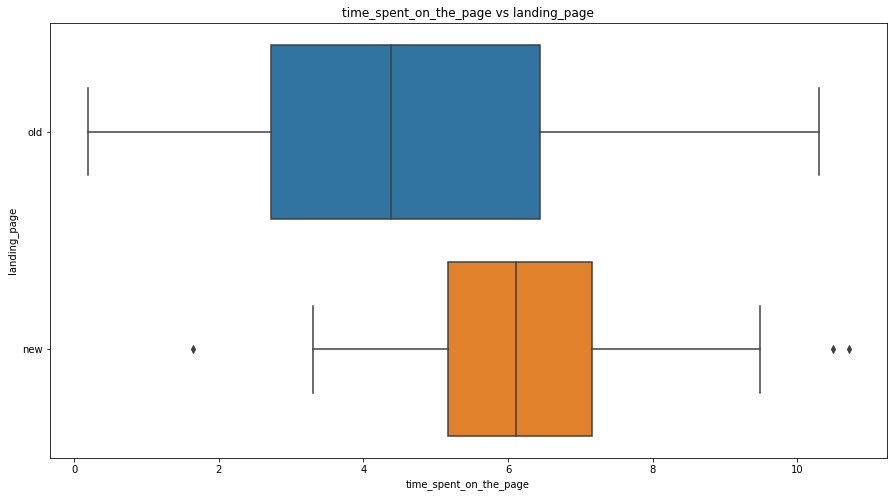

In [ ]:
# Displaying boxplot
plt.figure(figsize=(15,8))
sns.boxplot(data=df,x='time_spent_on_the_page',y='landing_page')
plt.title('time_spent_on_the_page vs landing_page')
plt.show()

**Observation:**

* Users spend more time on the website with the new landig page

Let's do the test statistic to check if this difference is significant

In [ ]:
import scipy
scipy.__version__

'1.4.1'

In [ ]:
!pip install --upgrade scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 38.1 MB 1.8 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


### Step 1: Define the null and alternate hypotheses

Let's write the null and alternative hypothesis
Let  μ1,μ2  be the mean time spent on the new landing page and mean time spent on the old landing page respectively.

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_1>\mu_2$

### Step 2: Select Appropriate test

Two Independent Sample T-test for Equality of Means - Equal Standard deviation

### Step 3: Decide the significance level

I wil use 5% significance level

### Step 4: Collect and prepare data

In [ ]:
# Creating a new DataFrame with only 'old' as value in the 'landing page' column
df_old=df.loc[df['landing_page']=='old']
# Creating a new DataFrame with only 'new' as value in the 'landing page' column
df_new=df.loc[df['landing_page']=='new']


In [ ]:
print('The average time spent on the old page is:',round(df_old['time_spent_on_the_page'].mean(),2))
print('The average time spent on the new page is:',round(df_new['time_spent_on_the_page'].mean(),2))
print('The standard deviation of time spent on the old page is:',round(df_old['time_spent_on_the_page'].std(),2))
print('The standard deviation of time spent on the new page is:',round(df_new['time_spent_on_the_page'].std(),2))

The average time spent on the old page is: 4.53
The average time spent on the new page is: 6.22
The standard deviation of time spent on the old page is: 2.58
The standard deviation of time spent on the new page is: 1.82


### Step 5: Calculate the p-value

In [ ]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(df_new['time_spent_on_the_page'], df_old['time_spent_on_the_page'], equal_var = True, alternative = 'greater')
print('The p-value is ' ,str(p_value))

The p-value is  0.0001316123528095005


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001316123528095005 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

We do have enough statistical evidence that users spend more time in the new landig page

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

In [ ]:
print(f' The proportions of converted in new landing page and old landing page are {round(33/50,2)}, {round(21/50,2)} respectively')

 The proportions of converted in new landing page and old landing page are 0.66, 0.42 respectively


**Observation:**

* With 50 users who visited the website with old landing page, 42% were converted

* With 50 users who visited the website with new landing page, 66% were converted



In [ ]:
# defining lists
conversion_rate = [66,42]
landing_page=['new_page','old_page']


# creating the dataframe using a dictionary
df1 = pd.DataFrame({'landing_page':landing_page,'conversion_rate':conversion_rate})
df1

,landing_page,conversion_rate
0,new_page,66
1,old_page,42


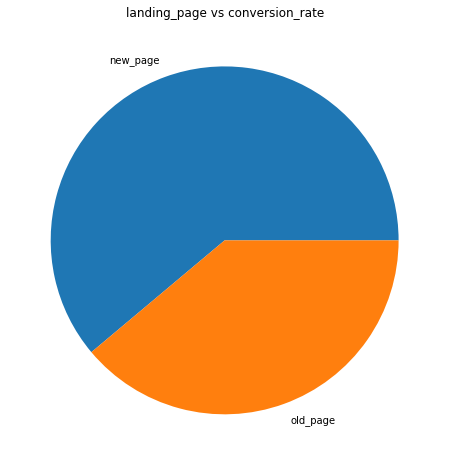

In [ ]:
plt.figure(figsize=(15,8))
plt.pie(df1['conversion_rate'],labels=df1['landing_page'])
plt.title('landing_page vs conversion_rate')
plt.show()

**Observation:**

* It can be observed in the pie chart that the conversion rate on the website with new landing page is greater that the conversion rate on the website with old landing page.

Now, let us check if the difference is significant

Let $p_1,p_2$ be the proportions of converted in new landing page and old landing page respectively.

We will test the null hypothesis

>$H_0:p_1 =p_2$

against the alternate hypothesis

>$H_a:p_1 > p_2$

In [ ]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the counts of not converted
converted = np.array([33, 21])

# set the sample sizes
nobs = np.array([50, 50])

# find the p-value
test_stat, p_value = proportions_ztest(converted, nobs,alternative='larger')
print('The p-value is ' , str(p_value))

The p-value is  0.008026308204056278


In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance (0.05), we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance (0.05), we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance (0.05), we reject the null hypothesis.


**Observation:**

* We do have enough statistical evidence that the conversion rate for the new landing page is greater than the conversion rate in the old landing page.

## 3. Is the conversion and preferred language are independent or related?

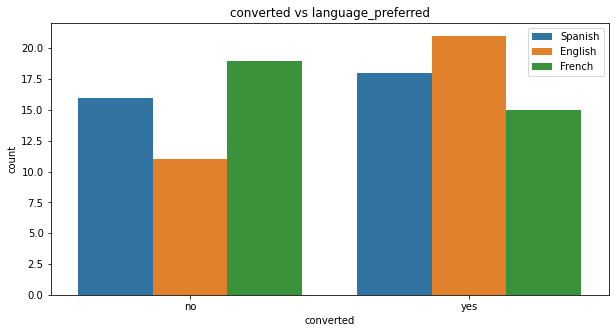

In [ ]:
# Diplaying count plot
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='converted',hue='language_preferred',dodge=True)
plt.title('converted vs language_preferred')
plt.legend(['Spanish','English','French'],bbox_to_anchor=(1,0.999))
plt.show()

**Observation:**

* We can observe that Engish speaking users were converted more than other languages speaking users.

Let us check if the conversion is independent of the language

$H_0:$ Conversion is independent of language

$H_a:$ Conversion is  NOT independent of language

In [ ]:
# Creating a contigency table
tab=pd.crosstab(df['converted'],df['language_preferred'])
tab

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


In [ ]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(tab)
print('The p-value is', p_value)

The p-value is 0.21298887487543447


In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance (0.05), we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance (0.05), we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance (0.05), we fail to reject the null hypothesis.


Observation:

* We do have enough statistical evidence that the conversion is independent of the languages

## 4. Is the time spent on the new page same for the different language users?

In [ ]:
# get the average time spent on the new page for each language
df_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean().reset_index()

,language_preferred,time_spent_on_the_page
0,English,6.66
1,French,6.20
2,Spanish,5.84


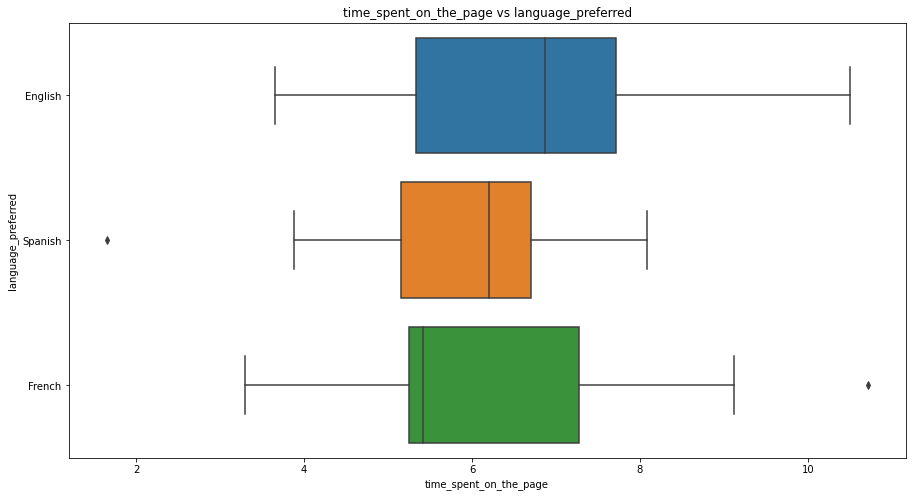

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_new,x='time_spent_on_the_page',y='language_preferred')
plt.title('time_spent_on_the_page vs language_preferred')
plt.show()

**Observation:**

* There is a difference on time spent on the new landing page for the different langauages

* On average english speaking users spend more time on the new landing page

* There are outliers in the lower side for spanish spaking users and in the upper side for french speaking users

Let's check if the difference is significant

Now, the normality and equality of variance assumptions need to be checked. 

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Time spent on the website with new landing page follows a normal distribution 

against the alternative hypothesis

>$H_a:$ Time spent on the website with new landing page does not follows a normal distribution 

In [ ]:
# Assumption 1: Normality

# find the p-value
w, p_value = stats.shapiro(df_new['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the test is greater than the leve of significant (0.05), we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [ ]:
#Assumption 2: Homogeneity of Variance

statistic, p_value = levene( df_new['time_spent_on_the_page'][df_new['language_preferred']=="English"], 
                                   df_new['time_spent_on_the_page'][df_new['language_preferred']=="French"], 
                                   df_new['time_spent_on_the_page'][df_new['language_preferred']=="Spanish"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is greater than the leve of significant (0.05), we fail to reject the null hypothesis of homogeneity of variances.

Let $\mu_1, \mu_2, \mu_3$ be the average time spent on the new page for English,French and Spanish speaking users respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one average time spent on the new landing page is different from the rest.

In [ ]:
#import the Anova function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(df_new.loc[df['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              df_new.loc[df['language_preferred'] == 'French', 'time_spent_on_the_page'],
                              df_new.loc[df['language_preferred'] == 'Spanish', 'time_spent_on_the_page'])
print('The p-value is ' ,str(p_value))

The p-value is  0.43204138694325955


In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance (0.05), we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance (0.05), we fail to reject the null hypothesis.')

As the p-value 0.46711357711340173 is greater than the level of significance (0.05), we fail to reject the null hypothesis.


**Observation:**

* We do have enough statistical evidene to conclude that the average time spent on the new page is same for all languages.

## Conclusion and Business Recommendations

### Conclusion:

* DataFrame contains 100 rows and 6 columns
* Both control and treatment have same frquency
* Both new and old page have same frequency
* On average user spend 5.38 minutes on the website
* The minimun time spent on the website is 0.19 minutes and maximun is 10.71 minutes
* 75% of visits spend 7.02 minutes or less on the webiste
* In the 100 people that visited the website 54 were converted
* Spanish is the preferred language
* There are no missing values in the DataFrame
* There are not duplicated values in the DataFrame
* 50% of users spend 5.7 minutes and more on the website
* The distribution of time spent on the website is slightly left skewed
* 54% of users were converted after visiting the website
* Both Spanish and French are the most preferred languages with 34% then English follow with 32%
* On average users in the treatment group spend more time on the website compared to users in the control group
* There are outliers in the treatment group
* On average users spend more time on the website with new landing page vis a vis the old landing page
* On average users who spend more time in the website got converted
* There are outliers in users who got converted
* There are outliers in the upper side on users who were not converted
* There are outliers in the time spent on website with new landing page
* users who speak English spend more time on the webiste,followed by French speaking users then Spanish speaking users
* There are outliers on the lower side for Spanish speaking users
* users in the control group visited only the website with old landing page wheras Visitors in the treatment group visited only the website with new landing page
* Most users speak French and Spanish in both control and treatment group
* There are more converted users in the new landing page
* English speaking users are the most converted 
* French speaking users are the least converted
* We do have enough statistical evidence that users spend more time in the new landig page
* We do have enough statistical evidence that the conversion rate for the new landing page is greater than the conversion rate in the old landing page
* We do have enough statistical evidence that the conversion is independent of the languages
* Even if the time spent on the new page for the 3 languages seems to be different,We do not have enough statistical evidene to prove that.

### Business Recommendations

* E-news Express should go with the website with the new landing page because:
  
  1. Users spend more time on the website with the new landing page.
  2. Conversion rate is high on the website with the new landing page.
  
* E-news Express should find a way of reaching more users who speak English as they spend more time on the website with new landing page; they are also the most converted after visiting the website with new landing page.

* E-news Express should also increase their visibility or advertise their portal to users who speak Spanish and French as most users who visited the website with the new landing page speak those 2 languages.